In [19]:
# Improting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Objectives:
      - For a new iris flower find its class.Is it setosa or virginica or versicolor

In [20]:
iris=pd.read_csv('dataset/irish.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# general info of data set
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
#(Q) How many data-points and feature
print(iris.shape)

(150, 5)


In [5]:
#(Q) What are the columns names in our dataset?
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [6]:
#(Q) How many data points for each class are present?
# (or) How many flowers for each species are present?

iris['species'].value_counts()

# Balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of points for every class are almost same
# It is important to check our dataset balanced or imbalanced
# For imbalanced dataset EDA is slightly different than balanced dataset(NOT much slightly different)


virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [7]:
# Basic Statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## (3.2) 2-D Scatter plot

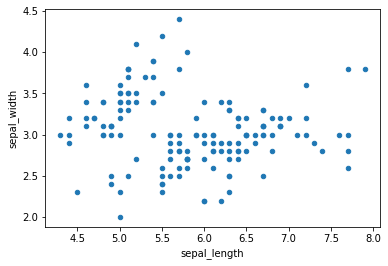

In [8]:
# 2-D scatter plot:
# Always understand the axis: labels and scale
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()
#can't make much sense out it.
#What if we color the points by their class-label/flower-type.

Above graph is not start with (0,0) it starts with (4.5,2.0).It is very important to look at this(**this is called scale**).All sepal length exits between 4.5 to 8.0 and all sepal_width exits between 2.0 to 4.5.

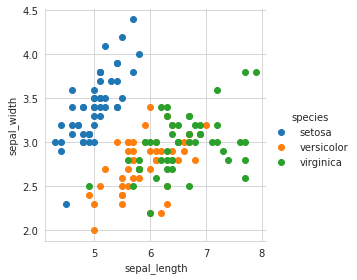

In [36]:
# 2-D Scatter plot with color-coding for each flower type/class
# Here 'sns' corresponds to seaborn


sns.set_style('whitegrid')
g=sns.FacetGrid(iris,hue='species',size=4)
g.map(plt.scatter,'sepal_length','sepal_width')
g.add_legend();
plt.show()

## Observations:
    1. Using sepal_lenght and sepal_width features,we can distinguish Setosa flowers from others.
    2. Seperating Versicolor and virginica is much harder as they have considerable overlap

# 3D Scatter plot
we can use ploty to create 3d scatter plot.But it is hard to draw 3d scatter plot in plane paper or notebook .Many data scientist try to avoid 3d plot if possible

<a href='https://plotly.com/python/3d-scatter-plots/' >plotly iris 3d plot</a>


#### What about 4D,5D or n-D scatter plot?
We human being only see upto 3d.We can't see above 3d.

**Our iris dataset have 4d scatter plot(sepal_length,sepal_width,petal_length,petal_width) for this we will use Pair-Plot.**



## (3.3) Pair-Plot

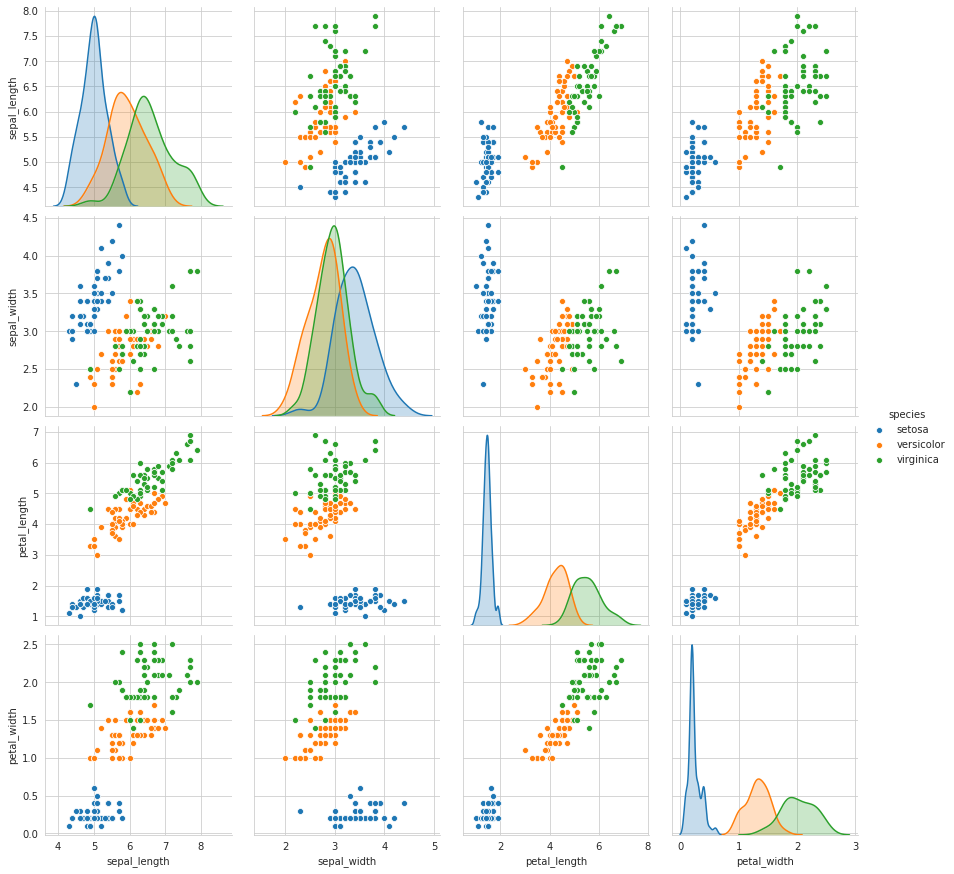

In [23]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris,hue='species',size=3)
plt.show()

# Observations:
    1. Petal_length and petal_width are the most useful features to identify various flower types.
    2.while Setosa can be easily identified(linearly seperable),vernica and Versicolor have some overlap(almost linerly seperable)
    3.We can find 'lines' and 'if-else' conditions to build a simple model to classify the flower types.

## Limitations of pair plot
In our data set it has 4 feature pair plot will be 4c2=6 plots.When we have 100, 1000 or more feature pair plot will not help much.

**In this situations we will use some tecnique such as linear algebra,PCA(principle components analysis),t-SNE**

# (3.4) Histogram,PDF,CDF
Earlier we will talk about 2d and 3d plot but how about 1d plot? 
Here is the histogram comes to the picture.Histogram is use to understand  1d diagram.

NameError: name 'iris_verginica' is not defined

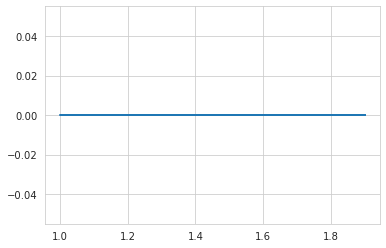

In [24]:
#1-D scatter plot of petal-length
import numpy as np
iris_setosa=iris.loc[iris['species']=='setosa']
iris_virginica=iris.loc[iris['species']=='virginica']
iris_versicolor=iris.loc[iris['species']=='versicolor']
#print(iris_setosa['petal_length'])
plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_verginica['petal_length'],np.zeros_like(iris_verginica['petal_length']))
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']))
plt.show()

#Disadvantages of 1-D scatter plot;Very hard to make sense as points
# are overlapping a lot
# Are there better ways fo visualiazing 1-D scatter plot? (which is histogram)

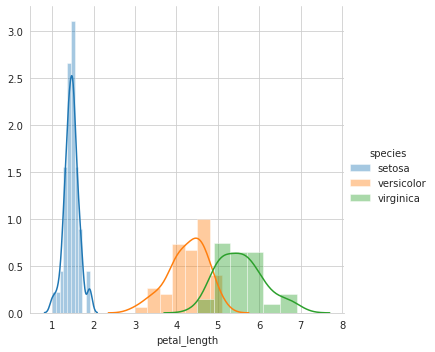

In [25]:
g=sns.FacetGrid(iris,hue='species',size=5)
g.map(sns.distplot,'petal_length')
g.add_legend()
plt.show()

PDF(probability density function) is simply a smoothnesss of histogram.

# Univariante Analysis:
- One variable Analysis.
- (q) We have 4 variable (sl,sw,pl,pw) .Now we want to find which variable is more to find the species.

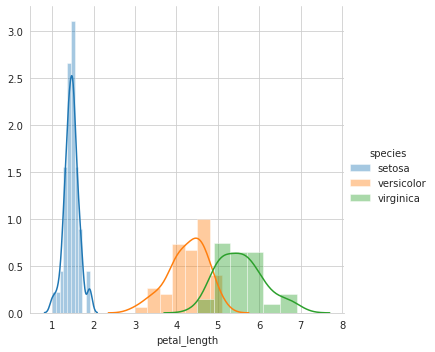

In [26]:
g=sns.FacetGrid(iris,hue='species',size=5)
g.map(sns.distplot,'petal_length')
g.add_legend()
plt.show()

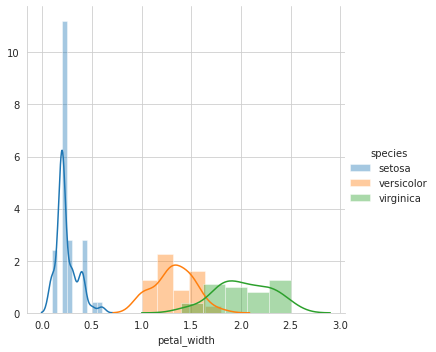

In [27]:
g=sns.FacetGrid(iris,hue='species',size=5)
g.map(sns.distplot,'petal_width')
g.add_legend()
plt.show()

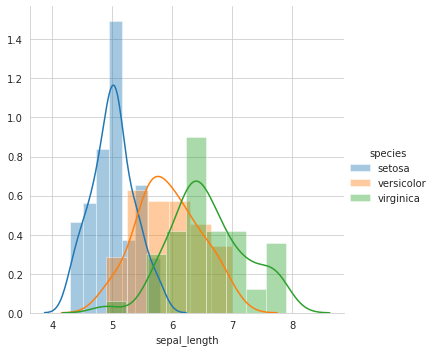

In [28]:
g=sns.FacetGrid(iris,hue='species',size=5)
g.map(sns.distplot,'sepal_length')
g.add_legend()
plt.show()

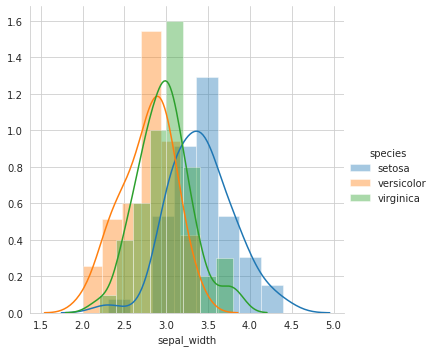

In [29]:
g=sns.FacetGrid(iris,hue='species',size=5)
g.map(sns.distplot,'sepal_width')
g.add_legend()
plt.show()

- From the above 4 figure we see that petal_lenght histogram is more important because in this histogram ,setosa is well seperated and versicolor and virginica is less overleaping.
- sepal_width histogram is worst because here it is very hard to seperate 3 species.
- This is the univariant analysis

- important variable rank would be : **petal_length > petal_width >> sepal_length > sepal_width**

# CDF(cumulative distribution function)

Text(0.5, 0, 'setosa petal_length')

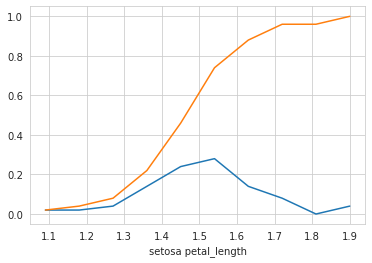

In [34]:
#Need for cululative distribution function(cdf)
# we can visually see what percentage of versicolor flowers have a petal_length of less than 1.6?
# hwo to construct cdf
# how to read cdf
#plot CDF of petal_length

counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
#Compute cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('setosa petal_length')


- From above figure,blue color curve representS PDF and orange color represents CDF.
- From PDF curve we can say that maximum number of setosa petal_length are between 1.5-1.6

- But from CDF curve we say that almost 95%(.95) setosa petal_length are =< 1.7
- 100%(1.0) setosa petal_length are =<1.9
- CDF is basically area under the curve of PDF
- If we differentiate CDF we will get PDF
- If we integrate PDF we will get CDF


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


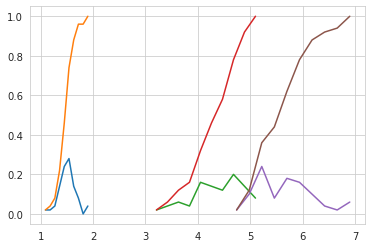

In [31]:
# plots of CDF of petal_length for various types of flowers.
# Misclassification error if you use petal_length only.

#-----------setosa petal_length---------------
counts,bin_edges=np.histogram(iris_setosa['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
#Compute cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#----------versicolor petal_length------------

counts,bin_edges=np.histogram(iris_versicolor['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
#Compute cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)





#----------virginica petal_length------------
counts,bin_edges=np.histogram(iris_virginica['petal_length'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
#Compute cdf
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()



## observation
- Blue one is pdf of setosa petal_lenght, yellow one is cdf of setosa petal_length
- green one is pdf of versicolor petal_length, red one is cdf of versicolor petal_length
- biolet one is pdf of virginica petal_length, other one is cdf of virginica petal_length
- 100% setosa petal_length less than 2

---------------For other two curve lets say **threshold value is 5** ----------------
- if petal_length > 2 and petal_length < 5 then it is versicolo ------<this condition will give 95% accurate>
- if petal_length > 2 and petal_length > 5 then it is virginica ------<10% of times this condition will mistake>

### Mean,Median,Mode,Variance,STD,Persentile,MAD(median absolute deviation),quartile,range,IQR 
- See from previous note....

# (3.7) Box plot and Whiskers

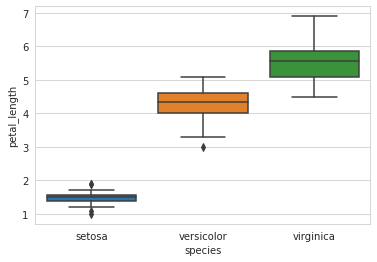

In [32]:
#Box plot with whiskers: another method of visualizing the 1-d scatter plot
#concept of median,percentile,quantile
#How to draw the box in the box plot
# how to draw whiskers: (no standard way) Could use min and max or 1.5*IQR


sns.boxplot(x='species',y='petal_length',data=iris)
plt.show()

- From histrogram we cant say what is the percentile value.
- But using box plot we can easily say the percentile value.Though we say roughly using CDF.But using box plot we say rightly.

# (3.8) Violin plots

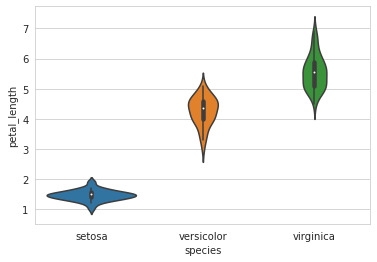

In [33]:
# A violin plot combines the benefits of histogram and box plot
# Denser regions of the data are fatter, and sparser ones thinner in a violin plot
sns.violinplot(x='species',y='petal_length',data=iris,size=8)
plt.show()

- violin plots are the combination of histrogram and box plot.
- middle box indicates box plot.
- white dot in the middle indicates 50th percentile
- bell curve indicates histogram

# (3.9) Summarizing plots in english
- Explain your findings/conclussions in plain english
- Never forget your objective(the problem your are solving).Perform all of your EDA aligned with your objectives.

# (3.10) Univariate,bivariate and multivariate analysis
- **Univariate** : when we are looking only one variable then it is univariate analysis.Example :histogram,boxplot,violin plots etc

- **Bivariate** : When we are looking two variables then it is bivariate analysis.Example : scatter plot,pair plot etc.

- **Multivariate** : When we are looing more than two variables then it is called multivariate analysis.

# (3.11) Multivariate probability density,contour plot

- 1-D probability density is PDF
- 2-D probability density is contour plot

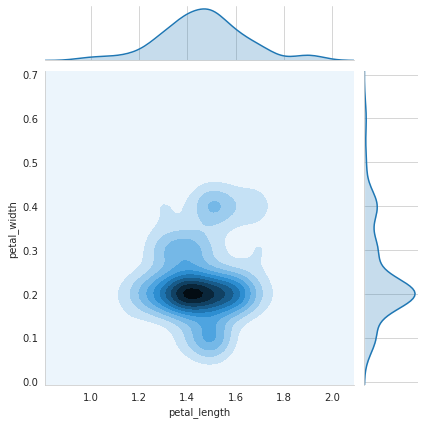

In [35]:
#2D Density plot,contours-plot
sns.jointplot(x='petal_length',y='petal_width',data=iris_setosa,kind='kde')
plt.show()

- Above figure shows the 2 variable(petal_length,petal_width) probability desity.
- The Darker blak region indicates most of the petal_length and petal_width of setosa are in this region.
- In each region all the points have the same height.
- This figure combines the petal_length and petal_width pdf in a single curve
- It represents in 3D .for better look <a href='https://en.wikipedia.org/wiki/Gaussian_function'>click here </a>

**We can't plot 3D probability density because we can't see 4th diamension.For this we need mathmetics like linear algebra.**